In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv(r"C:\Users\YAMUNA\OneDrive\Documents\weather_Navie_bayes_dataset.csv")
df


,Day,Outlook,Temperature,Humidity,Wind,PlayTennis
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
2,3,Overcast,Hot,High,Weak,Yes
3,4,Rain,Mild,High,Weak,Yes
4,5,Rain,Cool,Normal,Weak,Yes
5,6,Rain,Cool,Normal,Strong,No
6,7,Overcast,Cool,Normal,Strong,Yes
7,8,Sunny,Mild,High,Weak,No
8,9,Sunny,Cool,Normal,Weak,Yes
9,10,Rain,Mild,Normal,Weak,Yes


In [5]:
le=LabelEncoder()
for col in df.columns:
    df[col]=le.fit_transform(df[col])
    
    

In [6]:
df

,Day,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,2,1,0,1,0
1,1,2,1,0,0,0
2,2,0,1,0,1,1
3,3,1,2,0,1,1
4,4,1,0,1,1,1
5,5,1,0,1,0,0
6,6,0,0,1,0,1
7,7,2,2,0,1,0
8,8,2,0,1,1,1
9,9,1,2,1,1,1


In [10]:
x=df.drop("PlayTennis",axis=1)
y=df["PlayTennis"]

In [11]:
x_train,x_test,y_train,y_test=train_test_split(
x,y,test_size=0.2,random_state=42)

In [12]:
model=MultinomialNB()
model.fit(x_train,y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [14]:
y_pre=model.predict(x_test)
print("predicted value",y_pre)

predicted value [1 1 1 0]


In [15]:
y_test

0     0
17    1
15    1
1     0
Name: PlayTennis, dtype: int64

In [17]:
accuracy=accuracy_score(y_test,y_pre)
print("Model Accuracy:",accuracy)

Model Accuracy: 0.75


In [19]:
new_weather=pd.DataFrame(
[[2,0,0,1,1]],
columns=["Day","Outlook","Temperature","Humidity","Wind"]
)
probability=model.predict_proba(new_weather)[0]

In [20]:
probability

array([0.13252049, 0.86747951])

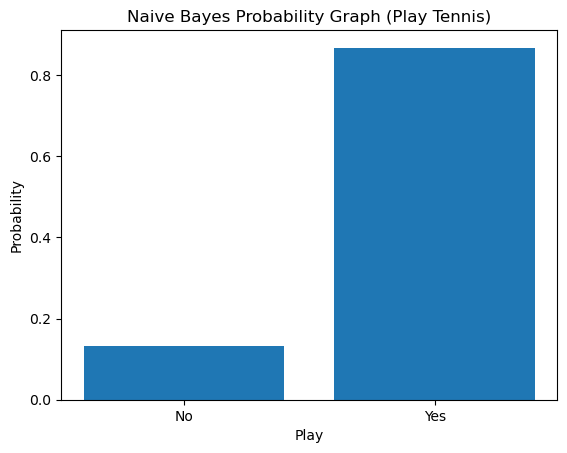

In [23]:
labels=["No","Yes"]
plt.figure()
plt.bar(labels,probability)
plt.xlabel("Play")
plt.ylabel("Probability")
plt.title("Naive Bayes Probability Graph (Play Tennis)")
plt.show()
